# Solución simbólica de ecuaciones diferenciales
En esta ocación comenzaremos con el modelos discreto
## Modelo del rendimiento de una cuenta de ahorro

<img style="center" src="https://static.pexels.com/photos/9660/business-money-pink-coins.jpg" width="500px" height="200px" alt="atom"/>

> **¿Tiene el dinero el mismo valor a lo largo del tiempo?** La respuesta es *no*. Todos lo hemos vivido. 

> Dos situaciones básicas:
1. <font color=blue>Inflación</font>: ¿Cuánto dinero necesitabas para comprar unas papas y un refresco hace 10 años? ¿Cuánto necesitas hoy?
2. <font color=blue>Interés</font>: no es lo mismo tener $\$10000$ MXN disponibles hoy a recibir $\$10000$ MXN en un año, pues los primeros pueden ser invertidos en un negocio o una cuenta bancaria para generar **interés**. Por lo tanto los $\$10000$ MXN disponibles hoy valen más que los $\$10000$ MXN que se recibirán en un año.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)

Referencias:
- http://www.sympy.org
- http://matplotlib.org
- http://www.numpy.org
- http://ipywidgets.readthedocs.io/en/latest/index.html

___
## Interés
Nos centraremos en como cambia el valor del dinero en el tiempo debido al **interés**. Existen dos tipos:

### Capitalización por interés simple
Este tipo de interés se calcula <font color=red>única y exclusivamente sobre la cantidad original que se invirtió</font>. Como consecuencia, el interés generado no forma parte del dinero que se invierte, es decir, los <font color=blue>intereses no ganan intereses</font>.

Suponga que se tiene un capital inicial $C_0$ y se invierte a un plazo de $k$ periodos (pueden ser meses, trimestres, semestres, años...) a una tasa de **interés simple** por periodo $i$. Al final del primer periodo, el capital $C_1$ que se obtiene es:

$$C_1=C_0+iC_0=C_0(1+i).$$

De la misma manera, como el interés solo se calcula sobre el capital inicial, al final del segundo periodo, el capital $C_2$ que se obtiene es:

$$C_2=C_1+iC_0=C_0+iC_0+iC_0=C_0(1+2i).$$

Así, al final del $k-$ésimo periodo, el capital $C_k$ que se obtiene es:

$$C_k=C_{k-1}+iC_0=C_0+kiC_0=C_0(1+ki).$$

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés simple del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [1]:
i=0.008
C0=10000
meta=11000
k=(meta/C0-1)/i
k

12.50000000000001

In [2]:
import numpy as np

In [3]:
k=np.ceil(k).astype('int') # ceil -> regresa el entero próximo mayor a 'k'
k

13

In [4]:
# Recalculamos el capital final
Ck=C0*(1+k*i)
Ck

11040.000000000002

> <font color=blue>**Actividad.**</font>
1. ¿Qué pasa si el interés no es del $0.8\%$ mensual sino del $1\%$ mensual?
2. ¿Qué pasa si la meta no son $\$11000$ MXN si no $\$12000$ MXN?

> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [5]:
import matplotlib.pyplot as plt

In [6]:
from ipywidgets import *

In [7]:
@interact(meta=(11000,20000,1000),i=(0.5,2,0.1),C0=fixed(10000))
def CapitalS(meta=11000,i=0.8,C0=10000):
    i=i/100
    k=np.ceil((meta/C0-1)/i).astype('int')
    periodos=np.linspace(0,k,k+1)
    Ck=C0*(1+periodos*i)
    plt.plot(periodos,Ck,'xk')
    plt.plot([0,k],[meta,meta],'--')
    plt.xlabel('Periodos (meses)')
    plt.ylabel('Capital (MXN)')
    plt.grid()
    print('El periodo necesario para llegar a ',meta,' son ',k,' meses. Acumulando ',round(Ck[-1],2),' MXN.',sep='')

interactive(children=(IntSlider(value=11000, description='meta', max=20000, min=11000, step=1000), FloatSlider…

Como se esperaba, el capital en el $k-$ésimo periodo $C_k=C_0(1+ki)$ crece linealmente con $k$.

### Capitalización por interés compuesto
El capital que genera el interés simple permanece constante todo el tiempo de duración de la inversión. En cambio, el que produce el interés compuesto en un periodo se <font color=red>convierte en capital en el siguiente periodo</font>. Esto es, el interés generado al final de un periodo <font color=blue>se reinvierte para el siguiente periodo para también producir interés</font>.

Suponga que se tiene un capital inicial $C_0$, y se va a ceder el uso de este capital por un periodo de tiempo determinado a una tasa de interés $i$. El capital que se obtiene al final del primer periodo $C_1$ se puede calcular por

$$C_1=C_0(1+i).$$ 

Si la anterior suma se vuelve a ceder a la misma tasa de interés, al final del periodo dos el capital $C_2$ es 

$$C_2=C_1(1+i)=C_0(1+i)^2.$$

Si se repite el anterior proceso $k$ veces, el capital al final del $k-$ésimo periodo $C_k$ es 

$$C_k=C_{k-1}(1+i)=C_0(1+i)^k.$$

**Referencia**:
- https://es.wikipedia.org/wiki/Inter%C3%A9s_compuesto.

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [8]:
meta=11000
C0=10000
i=0.008
k=np.ceil(np.log(meta/C0)/np.log(1+i)).astype('int')
k

12

In [9]:
Ck=C0*(1+i)**k
round(Ck,2)

11003.39

> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [10]:
@interact(meta=(11000,20000,1000),i=(0.5,2,0.1),C0=fixed(10000))
def CapitalC(meta=11000,i=0.008,C0=10000):
    i /= 100 # i=i/100
    k=np.ceil(np.log(meta/C0)/np.log(1+i)).astype('int')
    periodos=np.linspace(0,k,k+1)
    Ck=C0*(1+i)**periodos
    plt.plot(periodos,Ck,'xk')
    plt.plot([0,k],[meta,meta],'--')
    plt.xlabel('Periodos (meses)')
    plt.ylabel('Capital (MXK)')
    plt.grid()
    print('El número de periodos necesarios para alcanzar ',meta,' MXN, son ',k,' meses. Obteniendo ',round(Ck[-1],2),' MXN.')

interactive(children=(IntSlider(value=11000, description='meta', max=20000, min=11000, step=1000), FloatSlider…

El capital en el $k-$ésimo periodo $C_k=C_0(1+i)^k$ crece de manera exponencial con $k$.

> <font color=blue>**Actividad.**</font>
> - Modificar el código anterior para dejar fija la meta de ahorro y variar la tasa de interés compuesta.

### Capitalización continua de intereses
La capitalización continua se considera un tipo de capitalización compuesta, en la que a cada instante de tiempo $t$ se capitalizan los intereses. Es decir, la frecuencia de capitalización es infinita (o, equivalentemente, el periodo de capitalización tiende a cero).

Suponga que se tiene un capital inicial $C_0$, y que el capital acumulado en el tiempo $t$ es $C(t)$. Queremos saber cuanto será el capital pasado un periodo de tiempo $\Delta t$, dado que la tasa de interés efectiva para este periodo de tiempo es $i$. De acuerdo a lo anterior tenemos

$$C(t+\Delta t)=C(t)(1+i)=C(t)(1+r\Delta t),$$

donde $r=\frac{i}{\Delta t}$ es la tasa de interés instantánea. Manipulando la anterior expresión, obtenemos

$$\frac{C(t+\Delta t)-C(t)}{\Delta t}=r\; C(t).$$

Haciendo $\Delta t\to 0$, obtenemos la siguiente ecuación diferencial 

$$\frac{d C(t)}{dt}=r\; C(t),$$

sujeta a la condición inicial (monto o capital inicial) $C(0)=C_0$.

La anterior, es una ecuación diferencial lineal de primer orden, para la cual se puede calcular la *solución analítica*.

In [11]:
import sympy as sym

In [12]:
sym.dsolve?

In [13]:
sym.var('t',real=True) # Variable independiente
sym.var('r',real=True) # Parámetro
C=sym.Function('C')
C(t) # Siempre que llamemos a 'C', lo debemos hacer especificando que es función de un variable (en este caso 't').

C(t)

In [14]:
# Definimos la ecuación
eq=C(t).diff(t)-r*C(t)
eq

-r*C(t) + Derivative(C(t), t)

In [15]:
# Obtenemos la solución
sol=sym.dsolve(eq,C(t))
sol

Eq(C(t), C1*exp(r*t))

In [16]:
# Accedemos al lado derecho de la igualdad
sol.args[1]

C1*exp(r*t)

In [17]:
# Sustituyendo C1=10000
sol.args[1].subs('C1',10000)

10000*exp(r*t)

In [18]:
# Sustituyendo ambos parámetros
i=0.008
f=sol.args[1].subs({'C1': 10000,
                    r   : round(np.log(1+i),6)})
f

10000*exp(0.007968*t)

In [19]:
f.as_expr()

10000*exp(0.007968*t)

In [20]:
sym.solve(f.as_expr()-11000,t)

[11.9616189513460]

$$C(t) = C_0e^{rt}$$

La equivalencia entre la tasa de interés compuesta $i$ y la tasa de interés instantánea $r$ viene dada por

$$e^r=1+i.$$

___
¿Cómo podemos calcular la *solución numérica*?

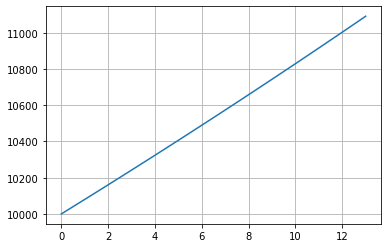

In [21]:
fn=sym.lambdify(t,f.as_expr(),'numpy')
t=np.linspace(0,13,100)
plt.plot(t,fn(t))
plt.grid()

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del $0.8\%$ mensual. 
>
> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuánto tiempo se debe dejar invertido el dinero?
>
> Muestre una gráfica que ilustre la situación.

In [23]:
from scipy.integrate import odeint

In [26]:
@interact(meta=(11000,20000,1000),i=(0.5,2,0.1),C0=fixed(10000))
def capitalCC(meta=11000,i=0.8,C0=10000):
    i /= 100
    r = np.log(1+i)
    # Podemos hacer el procedimiento de la obtención simbólica de la solución y despejar
    t=np.log(meta/C0)/r
    
    # Podemos obtener la solución numérica a partir del resultado simbólico
    periodos=np.linspace(0,t,100)
    def f(C,t,r):
        return r*C
    Ck=odeint(f,C0,periodos,args=(r,))
    plt.plot(periodos,Ck)
    plt.plot([0,t],[meta, meta],'--k')
    plt.xlabel('Periodos (meses)')
    plt.ylabel('Capital (MXN)')
    plt.grid()
    print('El tiempo necesario para alcanzar ',meta,' MXN, son ',round(t,2),' meses.')

interactive(children=(IntSlider(value=11000, description='meta', max=20000, min=11000, step=1000), FloatSlider…

___
## Tabla de abonos
Como aplicación importante del concepto de interés compuesto se encuentra la creación de un modelo de cuenta de ahorro.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)
- http://pbpython.com/amortization-model.html
- https://pbpython.com/amortization-model-revised.html

Ecuación de balance
$$
C_k=C_0(1+i)^k+\frac{A(1+i)^{k-1}-1}{i}
$$

In [27]:
meta=100000
C0=10000
i=0.008 # mensual
k=3     # años

**Instalación de `numpy_financial`**
```python
!pip install numpy-financial
```
o
```python
!conda install numpy-financial
```

In [ ]:
!pip install numpy-financial

In [28]:
import numpy_financial as npf

In [29]:
npf.pmt?

In [42]:
A=npf.pmt(i,k*12-1,C0,-meta)
A

2158.412131349268

In [31]:
import pandas as pd

In [47]:
periodos=np.linspace(0,k*12,k*12+1)
tabla=pd.DataFrame(index=periodos,columns=['Abono','Balance'])
tabla['Abono']=A
tabla.iloc[0,1]=C0*(1+i)**0
tabla.iloc[1:,1]=C0*(1+i)**periodos[1:]+A/i*((1+i)**(periodos[1:]-1)-1)
tabla

,Abono,Balance
0.0,2158.412131,10000.0
1.0,2158.412131,10080.0
2.0,2158.412131,12319.052131
3.0,2158.412131,14576.01668
4.0,2158.412131,16851.036945
5.0,2158.412131,19144.257371
6.0,2158.412131,21455.823562
7.0,2158.412131,23785.882282
8.0,2158.412131,26134.581471
9.0,2158.412131,28502.070254
